In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
import os

**Reading the CSV Data.**

In [2]:
df  = pd.read_csv("Chennai houseing sale.csv")
#visualize the data
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


**Checking the Metadata of file**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

**Checking the no. of rows and columns in file.**

In [5]:
df.shape

(7109, 22)

**Getting the count of no. of null values in each columns.**

In [6]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

**Replacing the null values with MEAN.**

In [7]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='mean',fill_value=None)
df['N_BEDROOM'] = imputer.fit_transform(df[['N_BEDROOM']])
df['N_BATHROOM'] = imputer.fit_transform(df[['N_BATHROOM']])
df['QS_OVERALL'] = imputer.fit_transform(df[['QS_OVERALL']])

**Printing the unique values in each Columns.**

In [10]:
for col in df.columns:
    if df[col].dtype=='object':
        print()
        print(col)
        print(df[col].unique())


PRT_ID
['P03210' 'P09411' 'P01812' ... 'P09594' 'P06508' 'P09794']

AREA
['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar']

DATE_SALE
['04-05-2011' '19-12-2006' '04-02-2012' ... '28-03-2014' '25-08-2006'
 '13-07-2005']

SALE_COND
['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']

PARK_FACIL
['Yes' 'No' 'Noo']

DATE_BUILD
['15-05-1967' '22-12-1995' '09-02-1992' ... '01-09-1978' '11-08-1977'
 '24-07-1961']

BUILDTYPE
['Commercial' 'Others' 'Other' 'House' 'Comercial']

UTILITY_AVAIL
['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub']

STREET
['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']

MZZONE
['A' 'RH' 'RL' 'I' 'C' 'RM']


**Getting the Stastical Description of Data**

In [11]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802845,0.409495,1.019099,0.891972,0.897834,0.887266,0.525440,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.503254,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.880000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


**Getting the count of properties in each area.**

In [12]:
df.AREA.value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

**Printing the count of properties in each area in proper tabular format.**

In [13]:
df.groupby('AREA',as_index=False)['PRT_ID'].count()

,AREA,PRT_ID
0,Adyar,773
1,Adyr,1
2,Ana Nagar,3
3,Ann Nagar,2
4,Anna Nagar,783
5,Chormpet,6
6,Chrmpet,6
7,Chrompet,1681
8,Chrompt,9
9,KK Nagar,996


**Count of Houses in different Areas in Chennai.**


*   Chrompet Area Has Maximum Number of Houses When Compared to Other areas

*  T Nagar Area Has Least Number of Houses in Chennai





In [ ]:
px.pie(df.groupby('AREA',as_index=False)['PRT_ID'].count(),values='PRT_ID',names='AREA',labels={'PRT_ID':'Count'},template='plotly_dark',color_discrete_sequence=px.colors.sequential.Plasma,hole=.5,title='<b> Houses Count in different Areas of Chennai</b>')

**How the Sales Price of Houses varies with Different Areas in Chennai ?**


*   T Nagar and Anna Nagar Area Houses Has Highest Sales Price and KK Nagar Area Houses are second highest Sales Price

*  Karapakam Area Houses has Lowest Sales Price When Compared to other Area Houses




In [21]:
px.box(df,x='AREA',y='SALES_PRICE',color='AREA',template='plotly_dark',title=' Sales Price of Houses in different Areas')

**How the Square Foot of the House will Effect the  Sales Price?**
* Increase in Square Foot of Houses increases the Sales price of Houses
* As we can see the Houses Related to Same Area  Having Almost Similar Square feet Length
* T Nagar and Anna Nagar Area Houses has Maximum Price Having Square Foot in the Range of 1500 to 2000
* KK Nagar Area Houses Has high Square foots from 1400 to 2500

In [24]:
px.scatter(df,x='INT_SQFT',y='SALES_PRICE',color='AREA',size='INT_SQFT',labels={'INT_SQFT':'SQFT','SALES_PRICE' : 'SALES PRICE'},template='plotly_dark',title='<b> SQFT VS SALES PRICE of Houses in Different Areas')

## How does the Sales Price Depends on the Main Road Distance From the House?
* It seems like Main Road Distance is not affecting the Sales Price of Houses
* The Price is same for the Houses having shorter Main Road Distance and Larger Main Road Distance
* So the Main Road Distance is not influencing more on Sales Price

In [25]:
px.scatter(df,x='DIST_MAINROAD',y='SALES_PRICE',color='AREA',size='SALES_PRICE',labels={'SALES_PRICE':'SALES PRICE','DIST_MAINROAD':'DISTNACE FROM MAINROAD'},template='plotly_dark',title='<b>DISTANCE FROM MAINROAD vs SALES PRICE')

## How the Sales Price Depends On the Build Date and Sale Date of Houses ?

* It seems like build date and sale date are not the driving factor of sales price.

In [26]:
fig = px.scatter(df, x='DATE_BUILD', y='SALES_PRICE', color='AREA', size='SALES_PRICE', labels={'SALES_PRICE':'SALES PRICE', 'DATE_BUILD':'BUILD DATE'},template='plotly_dark', title='<b>BUILD DATE vs SALES PRICE</B>')
fig.show()
fig = px.scatter(df, x='DATE_SALE', y='SALES_PRICE', color='AREA', size='SALES_PRICE', labels={'SALES_PRICE':'SALES PRICE', 'DATE_SALE':'SALE DATE'},template='plotly_dark', title='<b>SALE DATE vs SALES PRICE</B>')
fig.show()

## How the Sales Price Dependent On Number of Rooms ?

* As we can see increase in Rooms Count increases the Sales Price of Houses
* Houses having total Four and Five Rooms in the areas of Anna Nagar,Velacherry,KK Nagar and T Nagar Has Maximum Sales Price
* Karapakam,Adyar and Chrompet Area Houses having Two to Four Rooms but four room houses has maximum sales price when compared to others
* Anna Nagar,Velacherry and T Nagar Areas consists of Four to Five Room Houses
* KK Nagar Area Houses consists of Two to Six Rooms and the price incresases with increase in the Rooms Count

In [27]:
px.box(df, x='N_ROOM', y='SALES_PRICE', color='AREA', template='plotly_dark', labels={'SALES_PRICE':'SALES PRICE', 'N_ROOM':'NUMBER OF ROOMS'}, title='NUMBER OF ROOMS vs SALES PRICE')

## How does the Sales Price Depend on the Number of Bathrooms ?

* Increase in Bathrooms Increases the Sales Price in all Areas
* Anna Nagar and T Nagar Area houses having only one Bathroom have higher Sales Price when Compared to other Areas

In [28]:
px.box(df, x='N_BATHROOM', y='SALES_PRICE', color='AREA', template='plotly_dark', labels={'SALES_PRICE':'SALES PRICE', 'N_BATHROOM':'NUMBER OF BATHROOMS'}, title='NUMBER OF BATHROOMS vs SALES PRICE')

## How does the Sales Price Depend on the number of Bed Rooms ?

* Increase in Bed Rooms Increases the Sales Price
* Anna Nagar,T Nagar,Adyar,Karapakam and Chrompet Area Houses consists of one to two bedrooms but two bedroom houses has higger sales price in these areas
* KK Nagar Area Consists of Houses having one to four bedrooms and Sales price increases with increase in bedrooms
* Velacherry Area Houses Consist of two to three Bedrooms
* Out of all Anna Nagar and T Nagar Area Houses with two Bedrooms have Maximum Sales Price

In [29]:
px.box(df, x='N_BEDROOM', y='SALES_PRICE', color='AREA', template='plotly_dark', labels={'SALES_PRICE':'SALES PRICE', 'N_BEDROOM':'NUMBER OF BED ROOMS'}, title='NUMBER OF BED ROOMS vs SALES PRICE')

## How does the Sales Price depend on the Sale Condion of the Houses?

* Sales Price is higher for Normal, Family and AbNormal conditions of Sale

In [30]:
px.box(df, x='SALE_COND', y='SALES_PRICE', color='AREA', template='plotly_dark', labels={'SALES_PRICE':'SALES PRICE', 'SALE_COND':'SALE CONDITION'}, title='SALE CONDITION vs SALES PRICE')

## How does the Sales Price depend on the Parking Facility of the Houses?

* Sales Price is higher for the Houses having Parking Facility in different Areas

In [31]:
px.box(df, x='PARK_FACIL', y='SALES_PRICE', color='AREA', template='plotly_dark', labels={'SALES_PRICE':'SALES PRICE', 'PARK_FACIL':'PARKING FACILITY'}, title='PARKING FACILITY vs SALES PRICE')

## How does the Sales Price depends on the Build Type of the Houses?

* Commercial buildings have higher sales price in all areas

In [32]:
px.box(df, x='BUILDTYPE', y='SALES_PRICE', color='AREA', template='plotly_dark', labels={'SALES_PRICE':'SALES PRICE', 'BUILDTYPE':'BUILDING TYPE'}, title='BUILDING TYPE vs SALES PRICE')

## How does the Sales Price depend on the Street Type of the Houses?

* Sales Price is slightly lower in all areas where there is no acccess to street

In [33]:
px.box(df, x='STREET', y='SALES_PRICE', color='AREA', template='plotly_dark', labels={'SALES_PRICE':'SALES PRICE'}, title='STREET vs SALES PRICE')

## Correlation of All Columns in the Data

In [34]:
df.corr()


,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
INT_SQFT,1.000000,0.002022,0.786340,0.515261,0.951279,0.019850,-0.008337,0.008865,0.013989,0.657544,0.571076,0.612125
DIST_MAINROAD,0.002022,1.000000,-0.002565,0.001969,0.002301,0.002237,-0.029468,0.001554,-0.017255,0.011600,0.010994,0.018783
N_BEDROOM,0.786340,-0.002565,1.000000,0.755055,0.840280,0.015109,-0.007635,0.015566,0.014172,0.455351,0.430418,0.330999
N_BATHROOM,0.515261,0.001969,0.755055,1.000000,0.568564,0.013108,-0.012055,0.013190,0.007877,0.260249,0.256453,0.108865
N_ROOM,0.951279,0.002301,0.840280,0.568564,1.000000,0.016524,-0.007545,0.015072,0.015418,0.630932,0.533343,0.602760
QS_ROOMS,0.019850,0.002237,0.015109,0.013108,0.016524,1.000000,0.008828,0.007789,0.516147,0.019739,0.009377,0.021967
QS_BATHROOM,-0.008337,-0.029468,-0.007635,-0.012055,-0.007545,0.008828,1.000000,-0.011745,0.549056,-0.006719,-0.000471,-0.011377
QS_BEDROOM,0.008865,0.001554,0.015566,0.013190,0.015072,0.007789,-0.011745,1.000000,0.628168,0.021526,0.020118,0.018804
QS_OVERALL,0.013989,-0.017255,0.014172,0.007877,0.015418,0.516147,0.549056,0.628168,1.000000,0.022410,0.016946,0.020485
REG_FEE,0.657544,0.011600,0.455351,0.260249,0.630932,0.019739,-0.006719,0.021526,0.022410,1.000000,0.659903,0.878148


## Pairwise Correlation of All Columns in the Data

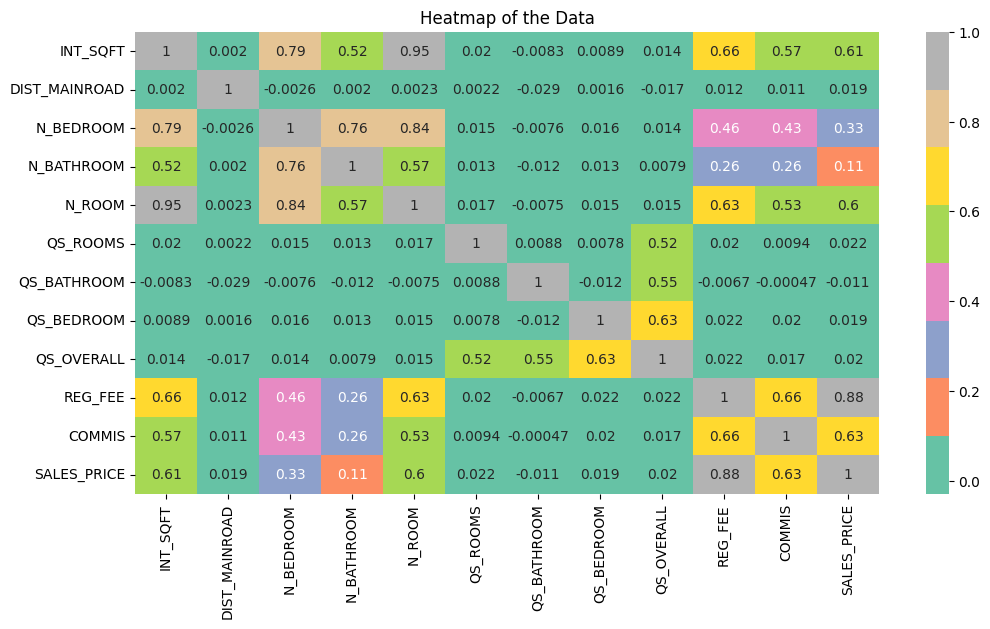

In [35]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap='Set2')
plt.title('Heatmap of the Data')
plt.show()